In [2]:
#Final Project

In [9]:
import pandas as pd 
import numpy as np

In [19]:
# Define file paths (Update these if filenames change)
Employee= pd.read_csv("/Users/rahmasaadawy/Downloads/Final_Project/HR/Employee.csv")
PerformanceRating= pd.read_csv("/Users/rahmasaadawy/Downloads/Final_Project/HR/PerformanceRating.csv")
RatingLevel= pd.read_csv("/Users/rahmasaadawy/Downloads/Final_Project/HR/RatingLevel.csv")
SatisfiedLevel= pd.read_csv("/Users/rahmasaadawy/Downloads/Final_Project/HR/SatisfiedLevel.csv")
EducationLevel= pd.read_csv("/Users/rahmasaadawy/Downloads/Final_Project/HR/EducationLevel.csv")

In [21]:
#Searching for Null values
print(Employee.isnull().sum())
print(PerformanceRating.isnull().sum())
print(RatingLevel.isnull().sum())
print(SatisfiedLevel.isnull().sum())
print(EducationLevel.isnull().sum())

EmployeeID                 0
FirstName                  0
LastName                   0
Gender                     0
Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome (KM)      0
State                      0
Ethnicity                  0
Education                  0
EducationField             0
JobRole                    0
MaritalStatus              0
Salary                     0
StockOptionLevel           0
OverTime                   0
HireDate                   0
Attrition                  0
YearsAtCompany             0
YearsInMostRecentRole      0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64
PerformanceID                      0
EmployeeID                         0
ReviewDate                         0
EnvironmentSatisfaction            0
JobSatisfaction                    0
RelationshipSatisfaction           0
TrainingOpportunitiesWithinYear    0
TrainingOpportunitiesTaken         0
WorkLifeBalance         

In [23]:
#Searching for duplicated values
print(Employee.duplicated().sum())
print(PerformanceRating.duplicated().sum())
print(RatingLevel.duplicated().sum())
print(SatisfiedLevel.duplicated().sum())
print(EducationLevel.duplicated().sum())

0
0
0
0
0


In [25]:
# Convert reviewdate to datetime
PerformanceRating['ReviewDate'] = pd.to_datetime(PerformanceRating['ReviewDate'], errors='coerce')

# Confirm the change
print(PerformanceRating.dtypes)

PerformanceID                              object
EmployeeID                                 object
ReviewDate                         datetime64[ns]
EnvironmentSatisfaction                     int64
JobSatisfaction                             int64
RelationshipSatisfaction                    int64
TrainingOpportunitiesWithinYear             int64
TrainingOpportunitiesTaken                  int64
WorkLifeBalance                             int64
SelfRating                                  int64
ManagerRating                               int64
dtype: object


In [27]:
#Merging Primary tables
merged_df = pd.merge(Employee, PerformanceRating, on="EmployeeID")

#Merging secondary tables 
education_level = pd.DataFrame({
    "EducationLevelID": [1, 2, 3, 4, 5],
    "EducationLevel": ["No Formal Qualifications", "High School", "Bachelors", "Masters", "Doctorate"]
})
merged_df = pd.merge(merged_df, education_level, left_on="Education", right_on="EducationLevelID", how="left")

In [29]:
# Merge Employee with PerformanceRating (Primary tables)
merged_df = pd.merge(Employee, PerformanceRating, on='EmployeeID', how='left')

# Merge with Satisfaction Levels (EnvironmentSatisfaction)
merged_df = pd.merge(merged_df, SatisfiedLevel, left_on='EnvironmentSatisfaction', right_on='SatisfactionID', how='left')

# Merge with Rating Levels (ManagerRating)
merged_df = pd.merge( merged_df, RatingLevel, left_on='ManagerRating', right_on='RatingID', how='left')

# Merge with Education Levels (Education)
merged_df = pd.merge( merged_df, EducationLevel, left_on='Education', right_on='EducationLevelID', how='left')

# Drop duplicate key columns
merged_df.drop(columns=['SatisfactionID', 'RatingID', 'EducationLevelID'], inplace=True)

# Check merged dataset structure
print(merged_df.info())

# Save the cleaned and merged dataset
merged_df.to_csv("Cleaned_Data.csv", index=False)

#Download the cleansed Data
merged_df.to_csv ("/Users/rahmasaadawy/Downloads/Cleaned_HR_Data.csv")
merged_df.to_excel("/Users/rahmasaadawy/Downloads/Cleaned_HR_Data.xlsx", index=False)

print(f"✅ Cleaned dataset saved successfully to: {"/Users/rahmasaadawy/Downloads/Cleaned_HR_Data.csv"}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6899 entries, 0 to 6898
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   EmployeeID                       6899 non-null   object        
 1   FirstName                        6899 non-null   object        
 2   LastName                         6899 non-null   object        
 3   Gender                           6899 non-null   object        
 4   Age                              6899 non-null   int64         
 5   BusinessTravel                   6899 non-null   object        
 6   Department                       6899 non-null   object        
 7   DistanceFromHome (KM)            6899 non-null   int64         
 8   State                            6899 non-null   object        
 9   Ethnicity                        6899 non-null   object        
 10  Education                        6899 non-null   int64      

In [31]:
# Check the structure of the dataset
print(merged_df.info())
print(merged_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6899 entries, 0 to 6898
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   EmployeeID                       6899 non-null   object        
 1   FirstName                        6899 non-null   object        
 2   LastName                         6899 non-null   object        
 3   Gender                           6899 non-null   object        
 4   Age                              6899 non-null   int64         
 5   BusinessTravel                   6899 non-null   object        
 6   Department                       6899 non-null   object        
 7   DistanceFromHome (KM)            6899 non-null   int64         
 8   State                            6899 non-null   object        
 9   Ethnicity                        6899 non-null   object        
 10  Education                        6899 non-null   int64      

In [33]:
############################## Ending of Week 1: Build Data Model, Data Cleaning and Preprocessing

In [35]:
############################## Week 2: Analysis Questions Phase

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Load the cleaned dataset
cleaned_data_path = "/Users/rahmasaadawy/Downloads/Cleaned_HR_Data.csv"
merged_df = pd.read_csv("/Users/rahmasaadawy/Downloads/Cleaned_HR_Data.csv", index_col=0)
merged_df

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating,SatisfactionLevel,RatingLevel,EducationLevel
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,3.0,2.0,3.0,0.0,4.0,3.0,3.0,Neutral,Meets Expectation,Doctorate
1,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,4.0,5.0,3.0,1.0,2.0,3.0,2.0,Satisfied,Needs Improvement,Doctorate
2,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,5.0,4.0,3.0,0.0,4.0,5.0,5.0,Very Satisfied,Above and Beyond,Doctorate
3,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,3.0,2.0,3.0,1.0,3.0,5.0,4.0,Very Dissatisfied,Exceeds Expectation,Doctorate
4,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,4.0,2.0,1.0,0.0,3.0,4.0,3.0,Neutral,Meets Expectation,Doctorate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6894,467E-977A,Jud,Melanaphy,Male,20,Some Travel,Technology,28,CA,Black or African American,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High School
6895,6FB9-A624,Marc,Calver,Non-Binary,27,Some Travel,Technology,8,CA,Black or African American,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bachelors
6896,EBF4-5928,Rudolph,MacDearmont,Male,21,Some Travel,Sales,4,CA,Black or African American,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Masters
6897,60E6-B1D9,Merill,Agg,Male,21,Some Travel,Technology,7,CA,Black or African American,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bachelors


In [41]:
# First Categoty
# Employee Demographics & Salary Analysis

In [218]:
#1.1 Calculate and display the total number of employees
total_employees = merged_df["EmployeeID"].nunique()
print(f"Total Number of Employees: {total_employees}")

Total Number of Employees: 1470


In [224]:
#1.2 Count unique employees by gender
unique_gender_counts = merged_df.groupby("EmployeeID")["Gender"].first().value_counts()

print("Unique Number of Male and Female Employees:")
print(unique_gender_counts)

Unique Number of Male and Female Employees:
Gender
Female               675
Male                 651
Non-Binary           124
Prefer Not To Say     20
Name: count, dtype: int64


Unique Number of Employees in Each Department:
Department
Technology         961
Sales              446
Human Resources     63
Name: count, dtype: int64


/var/folders/03/94ymsk8j2tb7j29w9l6vkzzw0000gn/T/ipykernel_1736/254342271.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_department_counts.values, y=unique_department_counts.index, palette="muted")


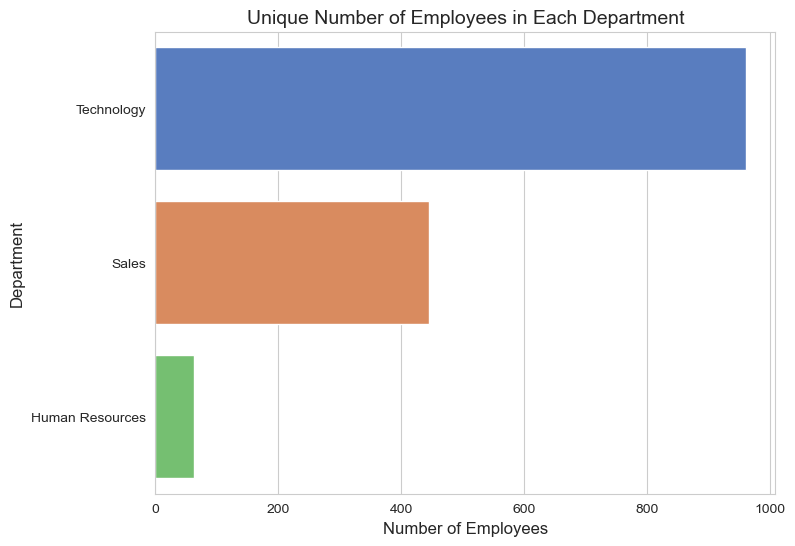

In [226]:
#1.3 Count unique employees by department
unique_department_counts = merged_df.groupby("EmployeeID")["Department"].first().value_counts()

print("Unique Number of Employees in Each Department:")
print(unique_department_counts)

# Visualize the unique number of employees in each department
# Set the plot style
sns.set_style("whitegrid")

# Create a bar plot for the unique employee count by department
plt.figure(figsize=(8, 6))
sns.barplot(x=unique_department_counts.values, y=unique_department_counts.index, palette="muted")

# Add labels and title
plt.title("Unique Number of Employees in Each Department", fontsize=14)
plt.xlabel("Number of Employees", fontsize=12)
plt.ylabel("Department", fontsize=12)

# Display the plot
plt.show()

Unique Number of Employees by Gender in Each Department:
Gender           Female  Male  Non-Binary  Prefer Not To Say
Department                                                  
Human Resources      33    24           5                  1
Sales               204   204          35                  3
Technology          438   423          84                 16


<Figure size 1000x700 with 0 Axes>

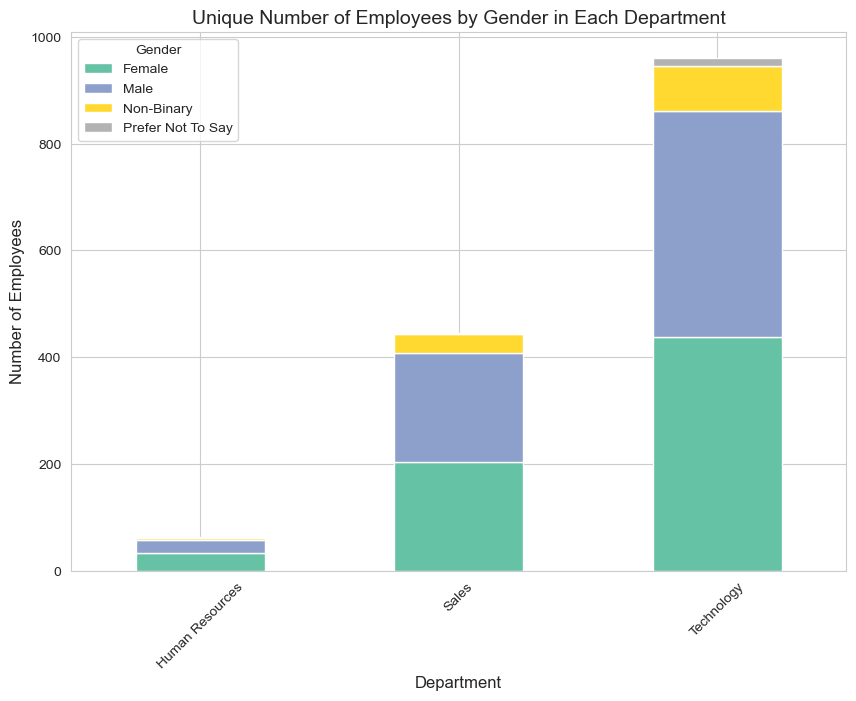

In [228]:
#1.4 Count unique employees by gender within each department
unique_gender_department_counts = merged_df.groupby(["Department", "EmployeeID"])["Gender"].first().reset_index()
gender_by_department = unique_gender_department_counts.groupby(["Department", "Gender"]).size().unstack(fill_value=0)

print("Unique Number of Employees by Gender in Each Department:")
print(gender_by_department)

# Visualize gender distribution within each department
plt.figure(figsize=(10, 7))
gender_by_department.plot(kind="bar", stacked=True, colormap="Set2", figsize=(10, 7))

plt.title("Unique Number of Employees by Gender in Each Department", fontsize=14)
plt.xlabel("Department", fontsize=12)
plt.ylabel("Number of Employees", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Gender")

plt.show()

Unique Number of Employees by Education Level:
EducationLevel
Bachelors                   572
Masters                     398
High School                 282
No Formal Qualifications    170
Doctorate                    48
Name: count, dtype: int64


/var/folders/03/94ymsk8j2tb7j29w9l6vkzzw0000gn/T/ipykernel_1736/433170451.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_education_counts.values, y=unique_education_counts.index, palette="muted")


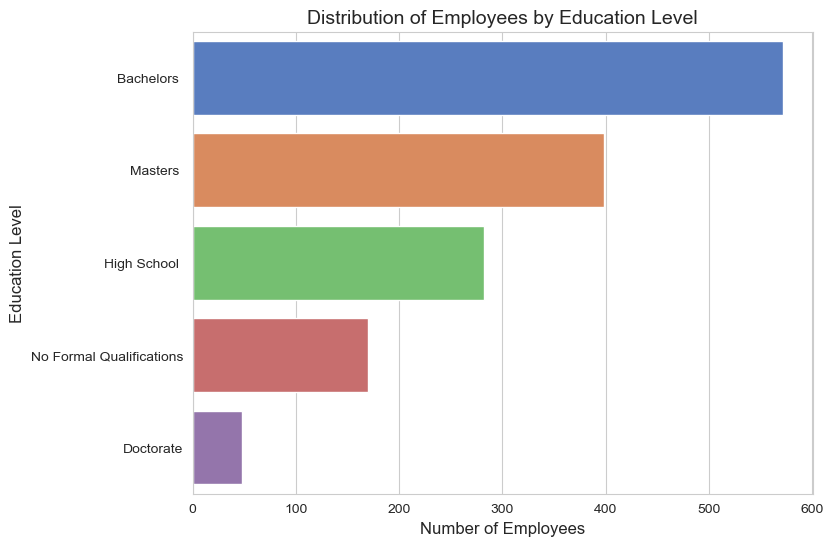

In [230]:
#1.5 Count unique employees by education level
unique_education_counts = merged_df.groupby("EmployeeID")["EducationLevel"].first().value_counts()

print("Unique Number of Employees by Education Level:")
print(unique_education_counts)

# Visualize the distribution of employees by education level
plt.figure(figsize=(8, 6))
sns.barplot(x=unique_education_counts.values, y=unique_education_counts.index, palette="muted")

plt.title("Distribution of Employees by Education Level", fontsize=14)
plt.xlabel("Number of Employees", fontsize=12)
plt.ylabel("Education Level", fontsize=12)

plt.show()

Unique Number of Employees by Job Role:
JobRole
Sales Executive              327
Software Engineer            294
Data Scientist               261
Machine Learning Engineer    146
Senior Software Engineer     132
Sales Representative          83
Engineering Manager           75
Analytics Manager             52
Manager                       37
HR Executive                  28
Recruiter                     24
HR Business Partner            7
HR Manager                     4
Name: count, dtype: int64


/var/folders/03/94ymsk8j2tb7j29w9l6vkzzw0000gn/T/ipykernel_1736/4202081888.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_jobrole_counts.values, y=unique_jobrole_counts.index, palette="Set2")


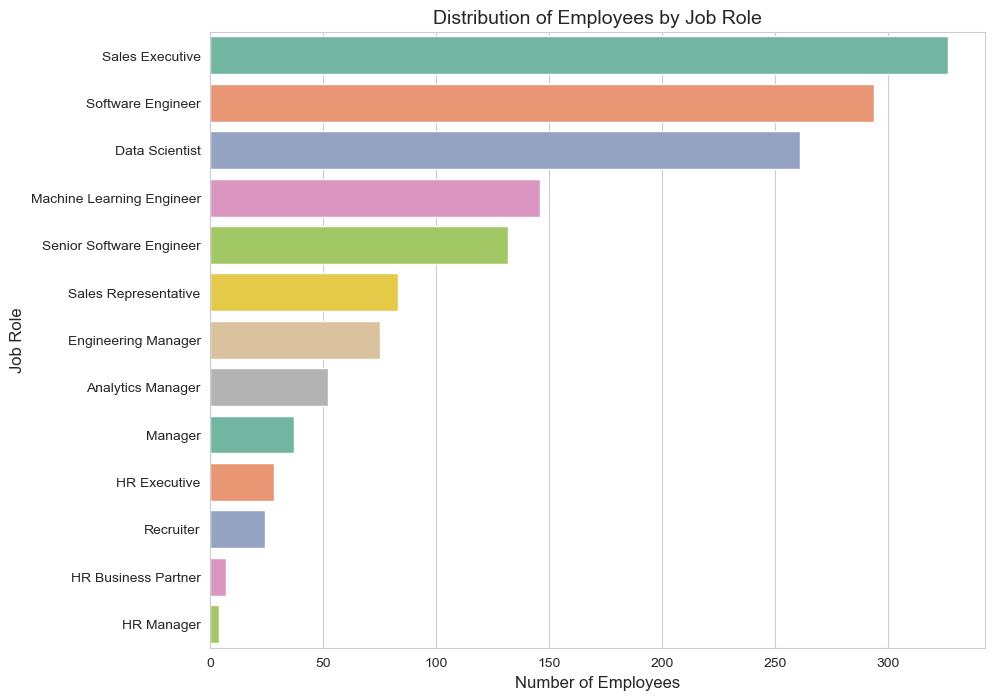

In [232]:
#1.6 Count unique employees by job role
unique_jobrole_counts = merged_df.groupby("EmployeeID")["JobRole"].first().value_counts()

print("Unique Number of Employees by Job Role:")
print(unique_jobrole_counts)

# Visualize the distribution of employees by job role
plt.figure(figsize=(10, 8))
sns.barplot(x=unique_jobrole_counts.values, y=unique_jobrole_counts.index, palette="Set2")

plt.title("Distribution of Employees by Job Role", fontsize=14)
plt.xlabel("Number of Employees", fontsize=12)
plt.ylabel("Job Role", fontsize=12)

plt.show()

Average Salary by Education Level:
EducationLevel
Doctorate                   154268.791667
Masters                     117641.057789
Bachelors                   115405.430070
High School                 105180.535461
No Formal Qualifications     94983.482353
Name: Salary, dtype: float64


/var/folders/03/94ymsk8j2tb7j29w9l6vkzzw0000gn/T/ipykernel_1736/106904704.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Salary', y='EducationLevel', data=avg_salary_by_education, palette="viridis")


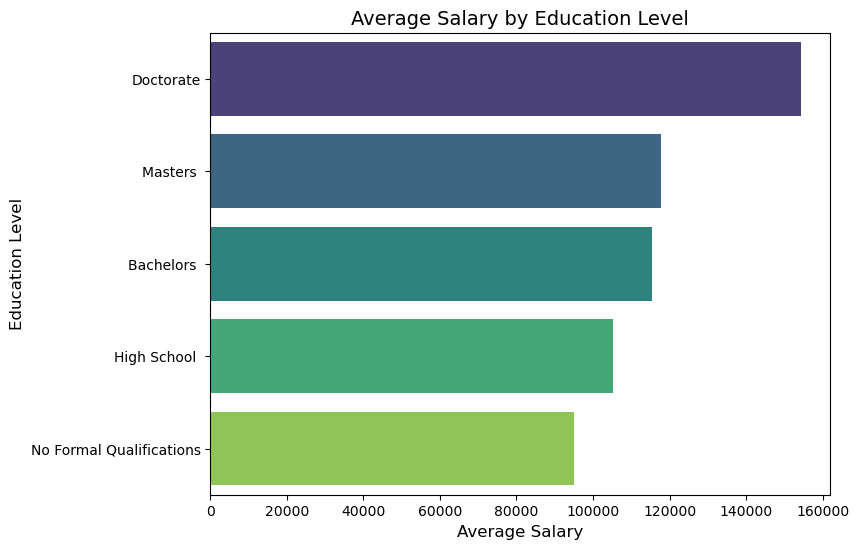

In [62]:
# 2. How does the average salary vary by education level?
avg_salary_by_education = merged_df.groupby("EmployeeID")[["EducationLevel", "Salary"]].first().groupby("EducationLevel")["Salary"].mean().sort_values(ascending=False)
print("Average Salary by Education Level:")
print(avg_salary_by_education)

# Convert the series to DataFrame
avg_salary_by_education = avg_salary_by_education.reset_index()

# Visualize the average salary by education level
plt.figure(figsize=(8, 6))
sns.barplot(x='Salary', y='EducationLevel', data=avg_salary_by_education, palette="viridis")

plt.title("Average Salary by Education Level", fontsize=14)
plt.xlabel("Average Salary", fontsize=12)
plt.ylabel("Education Level", fontsize=12)

plt.show()

In [77]:
# 3. Is there a gender pay gap across different job roles and departments?

Unique Number of Employees by Job Role:
JobRole
Sales Executive              327
Software Engineer            294
Data Scientist               261
Machine Learning Engineer    146
Senior Software Engineer     132
Sales Representative          83
Engineering Manager           75
Analytics Manager             52
Manager                       37
HR Executive                  28
Recruiter                     24
HR Business Partner            7
HR Manager                     4
Name: count, dtype: int64


/var/folders/03/94ymsk8j2tb7j29w9l6vkzzw0000gn/T/ipykernel_1736/631614572.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_jobrole_counts.values, y=unique_jobrole_counts.index, palette="Set2")


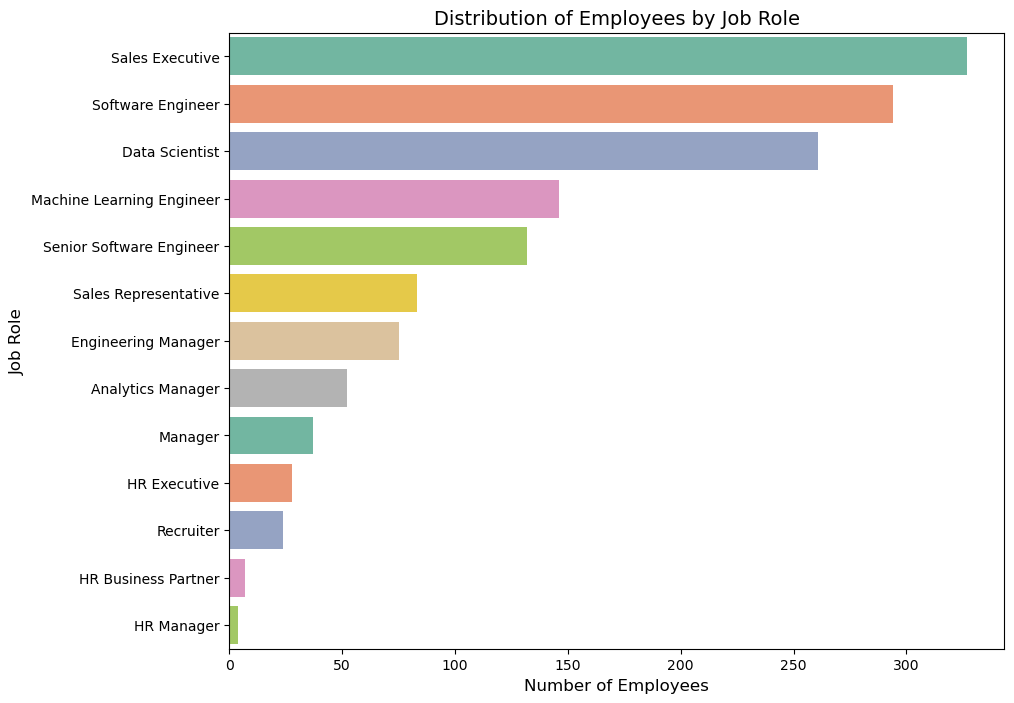

In [69]:
# Count unique employees by job role
unique_jobrole_counts = merged_df.groupby("EmployeeID")["JobRole"].first().value_counts()

print("Unique Number of Employees by Job Role:")
print(unique_jobrole_counts)

# Visualize the distribution of employees by job role
plt.figure(figsize=(10, 8))
sns.barplot(x=unique_jobrole_counts.values, y=unique_jobrole_counts.index, palette="Set2")

plt.title("Distribution of Employees by Job Role", fontsize=14)
plt.xlabel("Number of Employees", fontsize=12)
plt.ylabel("Job Role", fontsize=12)

plt.show()

Average Salary by Job Role:
JobRole
HR Manager                   449330.750000
Analytics Manager            346484.230769
Manager                      317531.054054
HR Business Partner          314002.428571
Engineering Manager          286258.506667
Machine Learning Engineer    130164.616438
Senior Software Engineer     126161.295455
Sales Executive              117195.538226
HR Executive                  94362.321429
Data Scientist                56079.494253
Software Engineer             51967.051020
Sales Representative          40656.421687
Recruiter                     37647.500000
Name: Salary, dtype: float64


/var/folders/03/94ymsk8j2tb7j29w9l6vkzzw0000gn/T/ipykernel_1736/952937992.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_by_jobrole.values, y=avg_salary_by_jobrole.index, palette="viridis")


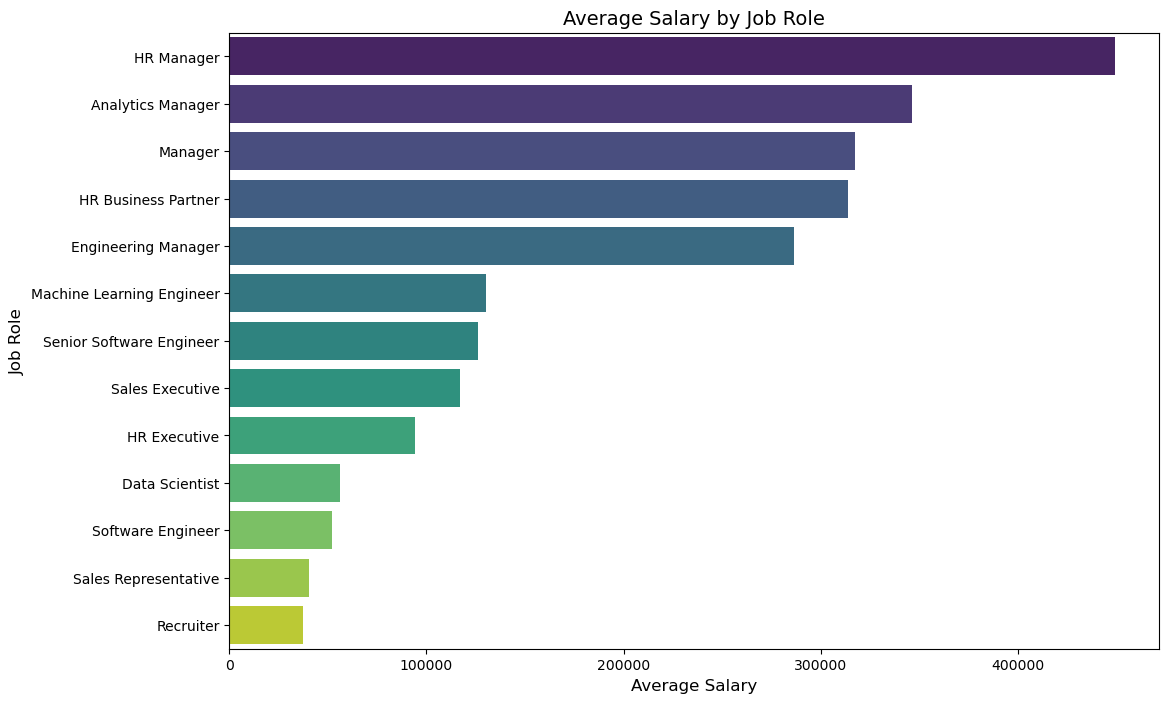

In [73]:
# Calculate the average salary by job role for unique employees
avg_salary_by_jobrole = merged_df.groupby("EmployeeID")[["JobRole", "Salary"]].first().groupby("JobRole")["Salary"].mean().sort_values(ascending=False)

print("Average Salary by Job Role:")
print(avg_salary_by_jobrole)

# Visualize the average salary by job role
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_salary_by_jobrole.values, y=avg_salary_by_jobrole.index, palette="viridis")

plt.title("Average Salary by Job Role", fontsize=14)
plt.xlabel("Average Salary", fontsize=12)
plt.ylabel("Job Role", fontsize=12)

plt.show()

Promotion Rate by Job Role (%):
JobRole
Recruiter                    37.500000
Sales Representative         34.939759
HR Business Partner          28.571429
Machine Learning Engineer    22.602740
HR Executive                 21.428571
Sales Executive              21.100917
Software Engineer            21.088435
Data Scientist               21.072797
Senior Software Engineer     12.878788
Engineering Manager          12.000000
Analytics Manager            11.538462
Manager                      10.810811
HR Manager                    0.000000
Name: count, dtype: float64


/var/folders/03/94ymsk8j2tb7j29w9l6vkzzw0000gn/T/ipykernel_1736/2626743584.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promotion_rate_by_jobrole.values, y=promotion_rate_by_jobrole.index, palette="coolwarm")


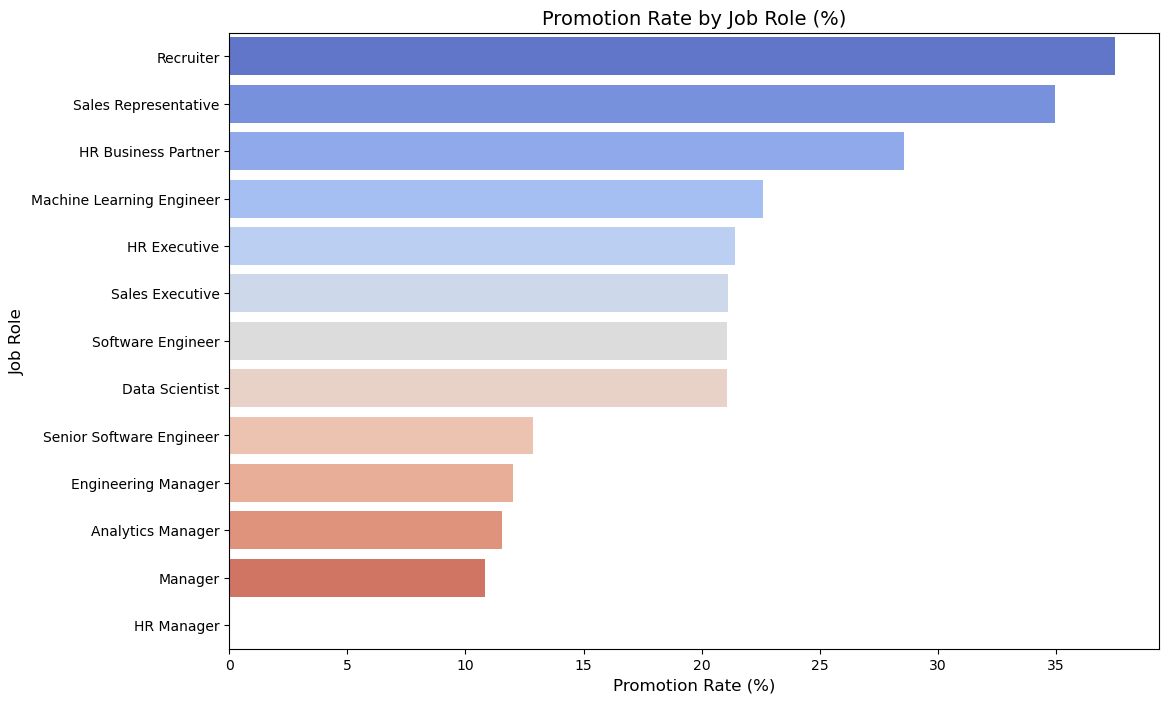

In [82]:
# 4. What is the salary distribution based on years of experience?
# Identify employees who have been promoted (YearsSinceLastPromotion == 0 indicates a recent promotion)
promoted_employees = merged_df[merged_df["YearsSinceLastPromotion"] == 0]

# Calculate the number of promoted employees by job role (unique employees only)
promotion_by_jobrole = promoted_employees.groupby("EmployeeID")["JobRole"].first().value_counts()

# Total unique employees by job role (for comparison)
total_by_jobrole = merged_df.groupby("EmployeeID")["JobRole"].first().value_counts()

# Calculate promotion rate by job role (% of promoted employees per role)
promotion_rate_by_jobrole = (promotion_by_jobrole / total_by_jobrole * 100).fillna(0).sort_values(ascending=False)

print("Promotion Rate by Job Role (%):")
print(promotion_rate_by_jobrole)

# Visualize promotion rate by job role
plt.figure(figsize=(12, 8))
sns.barplot(x=promotion_rate_by_jobrole.values, y=promotion_rate_by_jobrole.index, palette="coolwarm")

plt.title("Promotion Rate by Job Role (%)", fontsize=14)
plt.xlabel("Promotion Rate (%)", fontsize=12)
plt.ylabel("Job Role", fontsize=12)

plt.show()

In [89]:
# 5. Which departments have the highest and lowest average salaries?
salary_by_dept = merged_df.groupby('Department')['Salary'].mean().reset_index()
print(salary_by_dept.sort_values('Salary', ascending=False))

        Department         Salary
1            Sales  120568.309815
0  Human Resources  107629.555911
2       Technology  106245.325486


        Department         Salary
1            Sales  120568.309815
0  Human Resources  107629.555911
2       Technology  106245.325486


In [124]:
# Second Categoty
# Employee Satisfaction & Engagement

                      JobRole  JobSatisfaction
0           Analytics Manager         3.418269
1              Data Scientist         3.457353
2         Engineering Manager         3.526490
3         HR Business Partner         3.347826
4                HR Executive         3.434783
5                  HR Manager         3.250000
6   Machine Learning Engineer         3.453405
7                     Manager         3.435714
8                   Recruiter         3.469799
9             Sales Executive         3.435897
10       Sales Representative         3.378323
11   Senior Software Engineer         3.356275
12          Software Engineer         3.413043


/var/folders/03/94ymsk8j2tb7j29w9l6vkzzw0000gn/T/ipykernel_1736/1379388627.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='JobSatisfaction', y='JobRole', data=avg_satisfaction_by_role, ci=None)


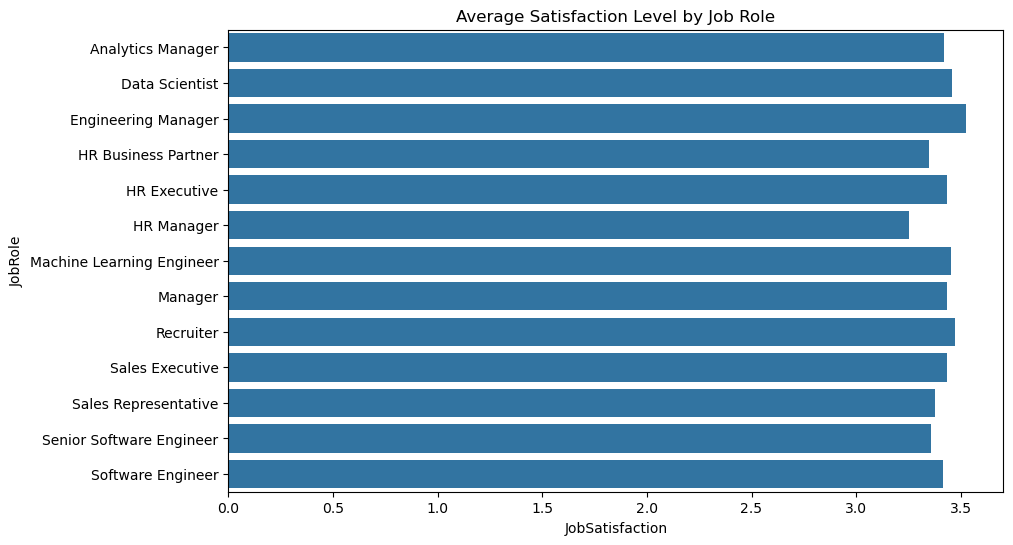

In [99]:
# 6. What is the average satisfaction level across different job roles?
# Average satisfaction by job role
avg_satisfaction_by_role = merged_df.groupby('JobRole')['JobSatisfaction'].mean().reset_index()
print(avg_satisfaction_by_role)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='JobSatisfaction', y='JobRole', data=avg_satisfaction_by_role, ci=None)
plt.title("Average Satisfaction Level by Job Role")
plt.show()

Correlation between Salary and Job Satisfaction: 0.005305484974307222


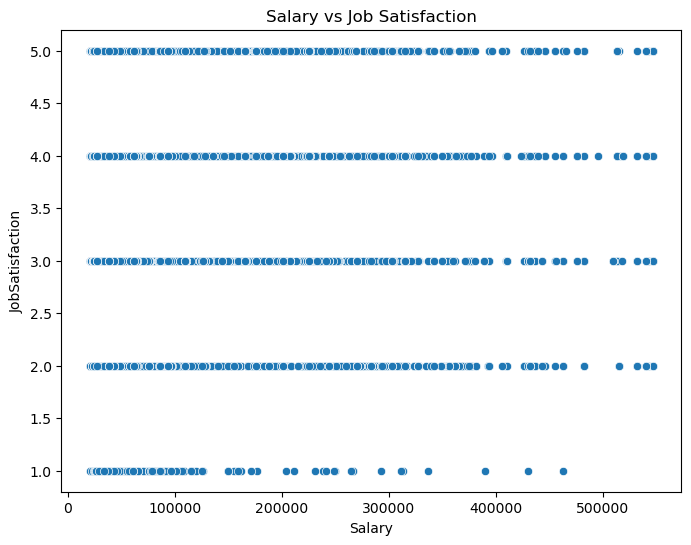

In [105]:
# 7. Is there a relationship between satisfaction level and salary?
corr_salary_satisfaction = merged_df['Salary'].corr(merged_df['JobSatisfaction'])
print(f"Correlation between Salary and Job Satisfaction: {corr_salary_satisfaction}")

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Salary', y='JobSatisfaction', data=merged_df)
plt.title('Salary vs Job Satisfaction')
plt.show()

In [132]:
# 8. Do employees with higher education levels report higher satisfaction?
# Average satisfaction by education level
satisfaction_by_edu = df.groupby('EducationLevel')['JobSatisfaction'].mean().reset_index()
print(satisfaction_by_edu)

             EducationLevel  JobSatisfaction
0                Bachelors          3.440015
1                 Doctorate         3.298578
2              High School          3.460400
3                  Masters          3.435146
4  No Formal Qualifications         3.377381


In [136]:
# 9. Which departments have the most satisfied and least satisfied employees?
# Average satisfaction by department
satisfaction_by_dept = df.groupby('Department')['JobSatisfaction'].mean().reset_index()
print(satisfaction_by_dept.sort_values('JobSatisfaction', ascending=False))

        Department  JobSatisfaction
0  Human Resources         3.435644
2       Technology         3.434578
1            Sales         3.422057


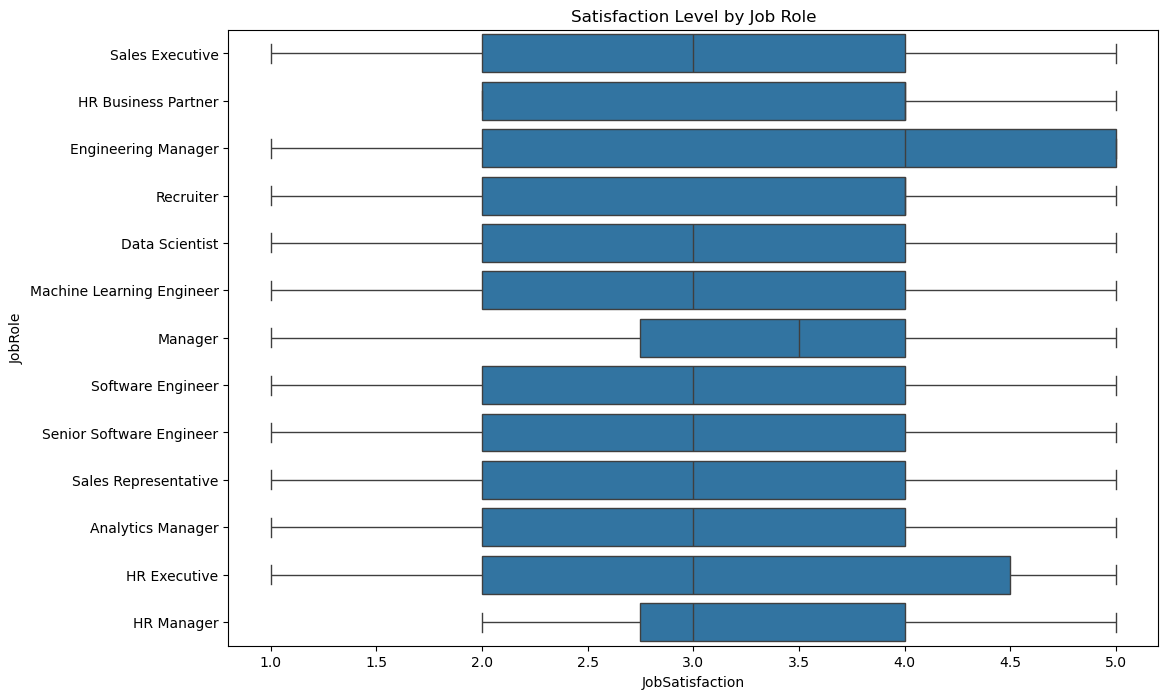

In [109]:
# 10. Does job role impact satisfaction level?
# Satisfaction level by job role
plt.figure(figsize=(12, 8))
sns.boxplot(x='JobSatisfaction', y='JobRole', data=merged_df)
plt.title('Satisfaction Level by Job Role')
plt.show()

In [142]:
# Third Categoty
# Attrition & Turnover Analysis

In [117]:
# 11. What is the overall employee attrition rate?
# Attrition rate

# Remove duplicate entries based on EmployeeID to ensure unique employees
unique_df = merged_df.drop_duplicates(subset=['EmployeeID'])

# Calculate the attrition rate after removing duplicates
attrition_rate = unique_df['Attrition'].value_counts(normalize=True) * 100

# Print the attrition rate
print(attrition_rate)

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


In [125]:
# 12. Which department has the highest employee turnover?
# Ensure unique employees before calculating attrition rate
unique_employees = merged_df.drop_duplicates(subset=['EmployeeID'])

# Calculate attrition rate per department
attrition_by_dept = unique_employees.groupby('Department')['Attrition'].apply(lambda x: (x == 'Yes').mean() * 100).reset_index()

# Sort by attrition rate in descending order
print(attrition_by_dept.sort_values('Attrition', ascending=False))

        Department  Attrition
1            Sales  20.627803
0  Human Resources  19.047619
2       Technology  13.839750


   SatisfactionLevel  TotalEmployees  AttritionEmployees  AttritionRate
0            Neutral             424                  83      19.575472
1     Very Satisfied             417                  80      19.184652
2         Satisfied              381                  66      17.322835
3       Dissatisfied              27                   4      14.814815
4  Very Dissatisfied              31                   4      12.903226


/var/folders/03/94ymsk8j2tb7j29w9l6vkzzw0000gn/T/ipykernel_1736/96147670.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SatisfactionLevel', y='AttritionRate', data=attrition_by_satisfaction, palette='coolwarm')


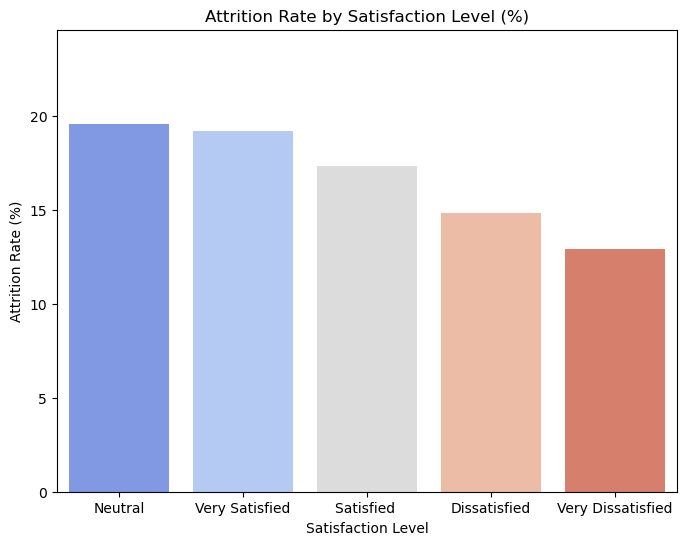

In [155]:
# 13. Is there a connection between satisfaction level and attrition? 
# Ensure unique employees by EmployeeID before calculation (drop duplicates)
unique_employees = merged_df.drop_duplicates(subset=['EmployeeID'])

# Group by SatisfactionLevel and calculate the required metrics
attrition_by_satisfaction = unique_employees.groupby('SatisfactionLevel').agg(
    TotalEmployees=('EmployeeID', 'count'),  # Count total unique employees in each satisfaction level
    AttritionEmployees=('Attrition', lambda x: (x == 'Yes').sum())  # Count unique employees who have attrition ('Yes')
)

# Calculate the attrition rate for each satisfaction level
attrition_by_satisfaction['AttritionRate'] = (attrition_by_satisfaction['AttritionEmployees'] / attrition_by_satisfaction['TotalEmployees']) * 100

# Sort by AttritionRate in descending order
attrition_by_satisfaction = attrition_by_satisfaction.sort_values('AttritionRate', ascending=False).reset_index()

# Print the result to show the attrition by satisfaction level
print(attrition_by_satisfaction)

# Visualization - Create a histogram for JobSatisfaction, distinguishing by Attrition

plt.figure(figsize=(8, 6))
sns.barplot(x='SatisfactionLevel', y='AttritionRate', data=attrition_by_satisfaction, palette='coolwarm')

# Customize plot
plt.title('Attrition Rate by Satisfaction Level (%)')
plt.xlabel('Satisfaction Level')
plt.ylabel('Attrition Rate (%)')
plt.ylim(0, max(attrition_by_satisfaction['AttritionRate']) + 5)  # Set y-limit dynamically

# Show the plot
plt.show()


Attrition Rate by Education Level (%):
EducationLevel
No Formal Qualifications    18.235294
Bachelors                   17.307692
High School                 15.602837
Masters                     14.572864
Doctorate                   10.416667
Name: count, dtype: float64


/var/folders/03/94ymsk8j2tb7j29w9l6vkzzw0000gn/T/ipykernel_1736/2642233808.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate_by_education.index, y=attrition_rate_by_education.values, palette="coolwarm")


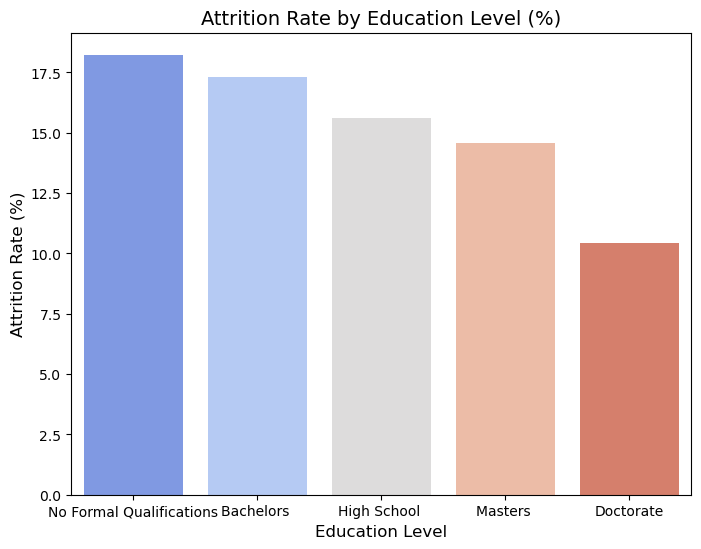

In [169]:
# 14. Do employees with higher education levels have lower attrition rates?
# Calculate attrition rate by education level using unique employees
attrition_by_education = merged_df.groupby("EmployeeID")[["EducationLevel", "Attrition"]].first()

# Count total unique employees and employees who left per education level
total_by_education = attrition_by_education["EducationLevel"].value_counts()
attrition_counts = attrition_by_education[attrition_by_education["Attrition"] == "Yes"]["EducationLevel"].value_counts()

# Calculate attrition rate (% of employees who left per education level)
attrition_rate_by_education = (attrition_counts / total_by_education * 100).fillna(0).sort_values(ascending=False)

print("Attrition Rate by Education Level (%):")
print(attrition_rate_by_education)

# Visualize attrition rate by education level
plt.figure(figsize=(8, 6))
sns.barplot(x=attrition_rate_by_education.index, y=attrition_rate_by_education.values, palette="coolwarm")

plt.title("Attrition Rate by Education Level (%)", fontsize=14)
plt.xlabel("Education Level", fontsize=12)
plt.ylabel("Attrition Rate (%)", fontsize=12)

plt.show()

Attrition Rate by Years at Company (%):
YearsAtCompany
1     34.463277
0     31.578947
2     20.161290
5     17.391304
3     16.216216
4     11.627907
6     10.891089
7      7.438017
8      5.042017
9      4.237288
10     0.781250
Name: count, dtype: float64


/var/folders/03/94ymsk8j2tb7j29w9l6vkzzw0000gn/T/ipykernel_1736/409883378.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate_by_tenure.index, y=attrition_rate_by_tenure.values, palette="coolwarm")


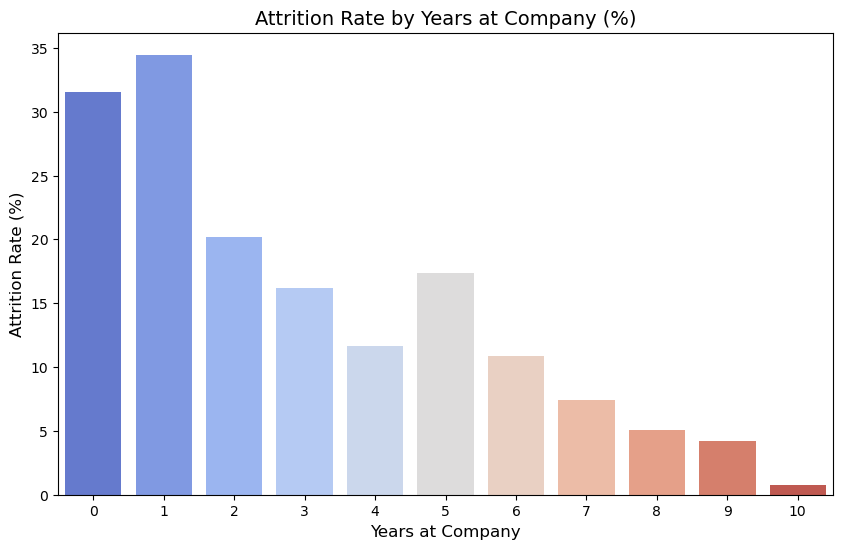

In [179]:
# 15. How does tenure (years at company) impact attrition?
# Calculate attrition rate by tenure (YearsAtCompany) using unique employees
attrition_by_tenure = merged_df.groupby("EmployeeID")[["YearsAtCompany", "Attrition"]].first()

# Count total unique employees and employees who left per tenure level
total_by_tenure = attrition_by_tenure["YearsAtCompany"].value_counts()
attrition_counts = attrition_by_tenure[attrition_by_tenure["Attrition"] == "Yes"]["YearsAtCompany"].value_counts()

# Calculate attrition rate (% of employees who left per tenure level)
attrition_rate_by_tenure = (attrition_counts / total_by_tenure * 100).fillna(0).sort_values(ascending=False)

print("Attrition Rate by Years at Company (%):")
print(attrition_rate_by_tenure)

# Visualize attrition rate by years at company
plt.figure(figsize=(10, 6))
sns.barplot(x=attrition_rate_by_tenure.index, y=attrition_rate_by_tenure.values, palette="coolwarm")

plt.title("Attrition Rate by Years at Company (%)", fontsize=14)
plt.xlabel("Years at Company", fontsize=12)
plt.ylabel("Attrition Rate (%)", fontsize=12)

plt.show()

In [ ]:
# Fourth Categoty
# Promotion & Career Growth

Average Time to Promotion: 3.44 years


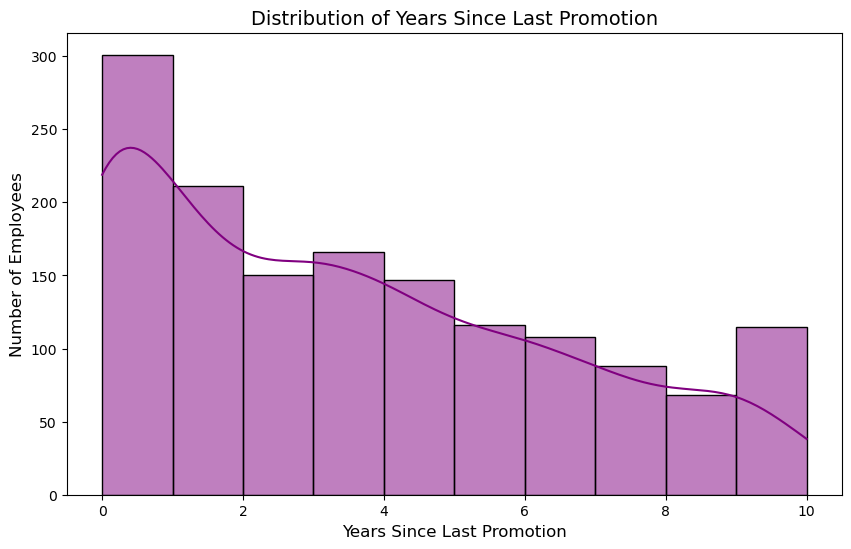

In [183]:
# 16. How long does it take, on average, for employees to receive a promotion?
# Average time to promotion
avg_time_to_promotion = merged_df.groupby("EmployeeID")["YearsSinceLastPromotion"].first().mean()

print(f"Average Time to Promotion: {avg_time_to_promotion:.2f} years")

# Visualizing distribution of years since last promotion
plt.figure(figsize=(10, 6))
sns.histplot(merged_df.groupby("EmployeeID")["YearsSinceLastPromotion"].first(), bins=10, kde=True, color="purple")

plt.title("Distribution of Years Since Last Promotion", fontsize=14)
plt.xlabel("Years Since Last Promotion", fontsize=12)
plt.ylabel("Number of Employees", fontsize=12)

plt.show()

Average Time to Promotion by Education Level (Years):
EducationLevel
Masters                     3.123116
Bachelors                   3.393357
No Formal Qualifications    3.582353
Doctorate                   3.687500
High School                 3.858156
Name: YearsSinceLastPromotion, dtype: float64


/var/folders/03/94ymsk8j2tb7j29w9l6vkzzw0000gn/T/ipykernel_1736/3214222776.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_promotion_by_education.values, y=avg_promotion_by_education.index, palette="coolwarm")


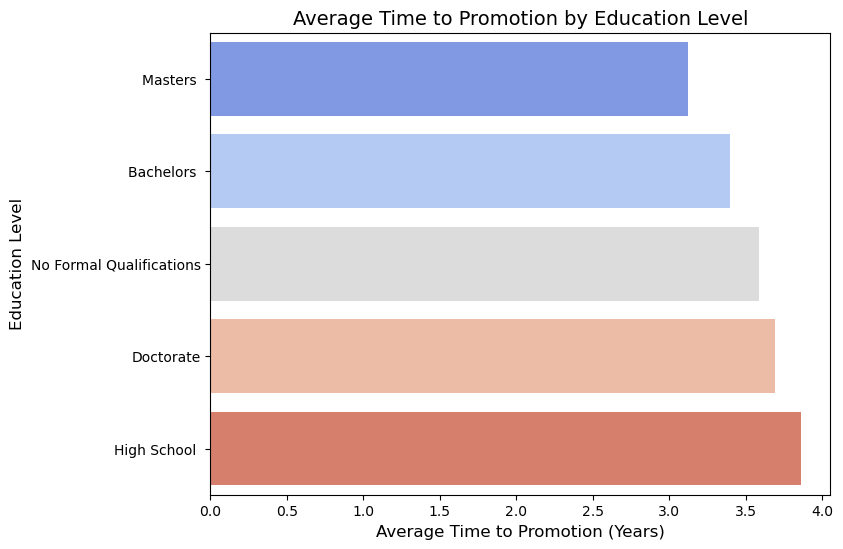

In [187]:
# 17. Is there a correlation between education level and promotion frequency?
# Promotion rate by education level
# Calculate promotion frequency by education level using unique employees
promotion_by_education = merged_df.groupby("EmployeeID")[["EducationLevel", "YearsSinceLastPromotion"]].first()

# Calculate the average time to promotion for each education level
avg_promotion_by_education = promotion_by_education.groupby("EducationLevel")["YearsSinceLastPromotion"].mean().sort_values()

print("Average Time to Promotion by Education Level (Years):")
print(avg_promotion_by_education)

# Visualizing the relationship between education level and promotion frequency
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_promotion_by_education.values, y=avg_promotion_by_education.index, palette="coolwarm")

plt.title("Average Time to Promotion by Education Level", fontsize=14)
plt.xlabel("Average Time to Promotion (Years)", fontsize=12)
plt.ylabel("Education Level", fontsize=12)

plt.show()

Average Time to Promotion by Department (Years):
Department
Sales              3.260090
Human Resources    3.285714
Technology         3.534860
Name: YearsSinceLastPromotion, dtype: float64


/var/folders/03/94ymsk8j2tb7j29w9l6vkzzw0000gn/T/ipykernel_1736/2322969403.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_promotion_by_department.values, y=avg_promotion_by_department.index, palette="Blues_r")


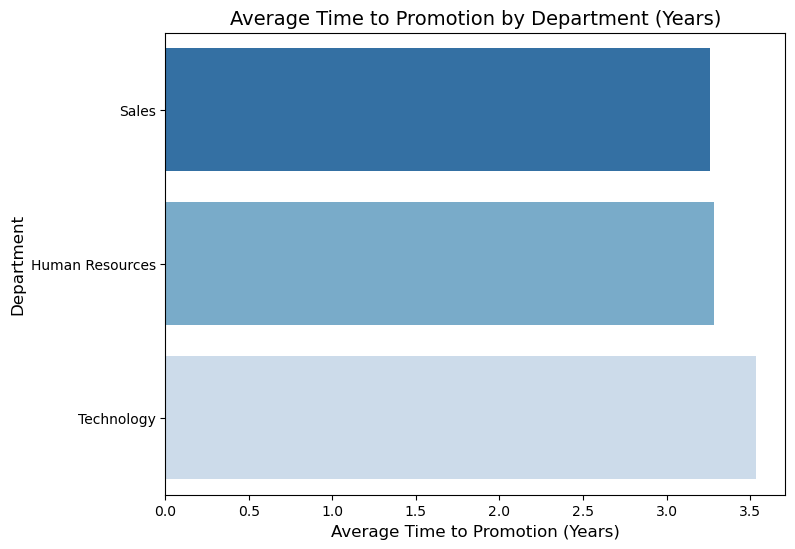

In [189]:
# 18. Which departments promote employees the fastest and the slowest?
# Promotion rate by department
# Calculate the average time to promotion by department using unique employees
promotion_by_department = merged_df.groupby("EmployeeID")[["Department", "YearsSinceLastPromotion"]].first()

# Compute the average years since last promotion for each department
avg_promotion_by_department = promotion_by_department.groupby("Department")["YearsSinceLastPromotion"].mean().sort_values()

print("Average Time to Promotion by Department (Years):")
print(avg_promotion_by_department)

# Visualizing the relationship between department and promotion speed
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_promotion_by_department.values, y=avg_promotion_by_department.index, palette="Blues_r")

plt.title("Average Time to Promotion by Department (Years)", fontsize=14)
plt.xlabel("Average Time to Promotion (Years)", fontsize=12)
plt.ylabel("Department", fontsize=12)

plt.show()

Promotion Rate by Job Satisfaction Level (%):
JobSatisfaction
1.0     4.166667
2.0    10.060976
3.0    14.285714
4.0    12.698413
5.0    13.461538
Name: count, dtype: float64


/var/folders/03/94ymsk8j2tb7j29w9l6vkzzw0000gn/T/ipykernel_1736/4244127750.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promotion_rate_by_satisfaction.index, y=promotion_rate_by_satisfaction.values, palette="coolwarm")


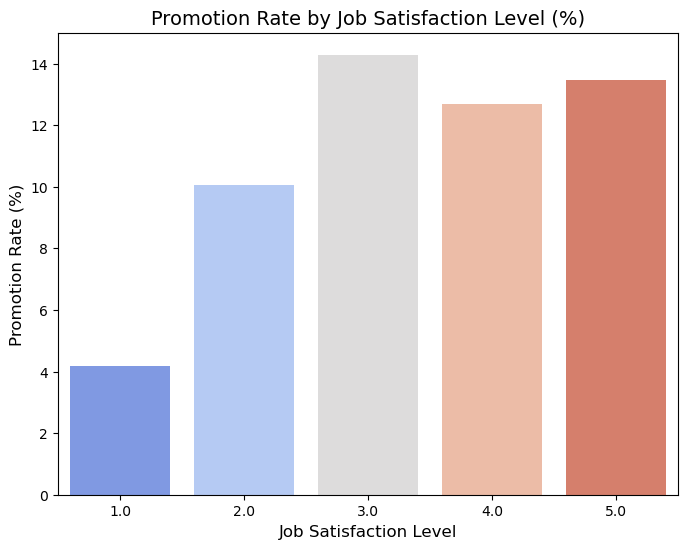

In [205]:
# 19. What percentage of satisfied employees receive promotions?
# Promotion rate for highly satisfied employees
# Identify promoted employees (YearsSinceLastPromotion == 0 indicates a recent promotion)
promoted_employees = merged_df[merged_df["YearsSinceLastPromotion"] == 0]

# Calculate total unique employees by satisfaction level
total_by_satisfaction = merged_df.groupby("EmployeeID")[["JobSatisfaction", "YearsSinceLastPromotion"]].first()["JobSatisfaction"].value_counts()

# Calculate number of promoted employees by satisfaction level
promoted_by_satisfaction = promoted_employees.groupby("EmployeeID")["JobSatisfaction"].first().value_counts()

# Calculate promotion rate by satisfaction level (% of promoted employees per satisfaction level)
promotion_rate_by_satisfaction = (promoted_by_satisfaction / total_by_satisfaction * 100).fillna(0).sort_index()

print("Promotion Rate by Job Satisfaction Level (%):")
print(promotion_rate_by_satisfaction)

# Visualizing promotion rate by satisfaction level
plt.figure(figsize=(8, 6))
sns.barplot(x=promotion_rate_by_satisfaction.index, y=promotion_rate_by_satisfaction.values, palette="coolwarm")

plt.title("Promotion Rate by Job Satisfaction Level (%)", fontsize=14)
plt.xlabel("Job Satisfaction Level", fontsize=12)
plt.ylabel("Promotion Rate (%)", fontsize=12)

plt.show()

Promotion Rate by Gender (%):
Gender
Prefer Not To Say    30.000000
Male                 21.351767
Female               19.703704
Non-Binary           18.548387
Name: count, dtype: float64


/var/folders/03/94ymsk8j2tb7j29w9l6vkzzw0000gn/T/ipykernel_1736/2755841693.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promotion_rate_by_gender.values, y=promotion_rate_by_gender.index, palette="Set2")


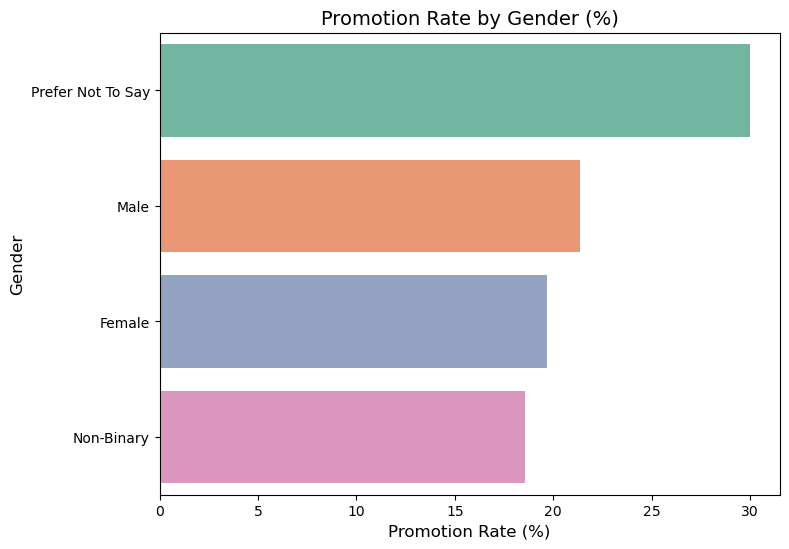

In [199]:
# 20. Does gender impact promotion opportunities?
# Promotion rate by gender
# Calculate promotion rate by gender using unique employees
promotion_by_gender = promoted_employees.groupby("EmployeeID")["Gender"].first().value_counts()

# Calculate total unique employees by gender for comparison
total_by_gender = merged_df.groupby("EmployeeID")["Gender"].first().value_counts()

# Calculate promotion rate by gender (% of promoted employees per gender)
promotion_rate_by_gender = (promotion_by_gender / total_by_gender * 100).fillna(0).sort_values(ascending=False)

print("Promotion Rate by Gender (%):")
print(promotion_rate_by_gender)

# Visualizing promotion rate by gender
plt.figure(figsize=(8, 6))
sns.barplot(x=promotion_rate_by_gender.values, y=promotion_rate_by_gender.index, palette="Set2")

plt.title("Promotion Rate by Gender (%)", fontsize=14)
plt.xlabel("Promotion Rate (%)", fontsize=12)
plt.ylabel("Gender", fontsize=12)

plt.show()

In [ ]:
# Save analysis results to Excel
output_path = "/Users/rahmasaadawy/Downloads/AnalysisQA.csv"
output_path = "/Users/rahmasaadawy/Downloads/AnalysisQA.xlsx"

with pd.ExcelWriter(output_path) as writer:
    avg_salary_by_edu.to_excel(writer, sheet_name="Salary by Education")
    salary_by_dept.to_excel(writer, sheet_name="Salary by Department")
    attrition_by_dept.to_excel(writer, sheet_name="Attrition by Department")
    promotion_by_dept.to_excel(writer, sheet_name="Promotion by Department")

print(f"HR analysis results saved to: {/Users/rahmasaadawy/Downloads/AnalysisQA.csv}")

In [172]:
# Save analysis results 

# Define file paths
excel_path = "/Users/rahmasaadawy/Downloads/AnalysisQA.xlsx"
csv_path = "/Users/rahmasaadawy/Downloads/AnalysisQA.csv"

# Save data to an Excel file with multiple sheets
with pd.ExcelWriter(excel_path) as writer:
    avg_salary_by_edu.to_excel(writer, sheet_name="Salary by Education", index=False)
    salary_by_dept.to_excel(writer, sheet_name="Salary by Department", index=False)
    attrition_by_dept.to_excel(writer, sheet_name="Attrition by Department", index=False)
    promotion_by_dept.to_excel(writer, sheet_name="Promotion by Department", index=False)

# Save data to separate CSV files (since CSV does not support multiple sheets)
avg_salary_by_edu.to_csv(csv_path.replace(".csv", "_SalaryByEducation.csv"), index=False)
salary_by_dept.to_csv(csv_path.replace(".csv", "_SalaryByDepartment.csv"), index=False)
attrition_by_dept.to_csv(csv_path.replace(".csv", "_AttritionByDepartment.csv"), index=False)
promotion_by_dept.to_csv(csv_path.replace(".csv", "_PromotionByDepartment.csv"), index=False)

# Print confirmation message
print(f"HR analysis results saved to: {excel_path} and multiple CSV files in the Downloads folder.")

HR analysis results saved to: /Users/rahmasaadawy/Downloads/AnalysisQA.xlsx and multiple CSV files in the Downloads folder.


In [174]:
############################## Ending of Week 2: Analysis Questions Phase